# Cell type deconvolution (directly from H&E image)

In [ ]:
import spotscope as ss
from PIL import Image
import numpy as np

# 调整 Pillow 的安全限制
Image.MAX_IMAGE_PIXELS = None
# Load the image
image_path = "example_data/MOB_celltype/standard_MOB.jpg"


# Better load reference dataset if available.
# Or you can comment it for lower computation cost.

reference_dataset_paths = [
    "example_data/MOB_celltype/mouse_bolb_1.h5ad",
    "example_data/MOB_celltype/mouse_bolb_2.h5ad",
    "example_data/MOB_celltype/mouse_bolb_3.h5ad",
    "example_data/MOB_celltype/mouse_bolb_4.h5ad",
    "example_data/MOB_celltype/mouse_bolb_5.h5ad",
    "example_data/MOB_celltype/mouse_bolb_6.h5ad",
    "example_data/MOB_celltype/mouse_bolb_7.h5ad",
    "example_data/MOB_celltype/mouse_bolb_8.h5ad",
]

grid_size = 228  # control the inference resolution, smaller is more dense!
density_threshold = 0.99
adata_st = ss.infer_from_image(
    image_path,
    reference_adata_paths= reference_dataset_paths, # comment out this line if no reference data
    model_path="ckpt/mob_celltype.pt",
    model=ss.CLIPModel(0.01, 1024, 4, 128),
    grid_size=grid_size,
    density_threshold=density_threshold,
    topk=50,
    lower_perc=0.5,
    mode="advanced",
    annotation_type="continuous",
    annotation_list=np.array(['GC', 'M/TC', 'PGC', 'OSNs'], dtype=object)

)

/nas/ljc/download/miniconda3/envs/spotscope/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Detecting coordinates in tissue...
Building reference loaders
Finished building reference loaders


/nas/ljc/Spotscope/spotscope/utils.py:115: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path)


Finished loading model
Building query loaders
Finished building query loaders
Getting image embeddings...


100%|██████████| 18/18 [00:01<00:00, 10.50it/s]


Getting spot embeddings...


100%|██████████| 64/64 [00:00<00:00, 68.08it/s]


Getting reference annotations...


100%|██████████| 64/64 [00:00<00:00, 67.12it/s]


Getting query coordinates...


100%|██████████| 18/18 [00:00<00:00, 41.66it/s]

Querying...


In [2]:
adata_st

AnnData object with n_obs × n_vars = 545 × 2
    uns: 'spatial', 'reference_dataloaders', 'reference_dataset', 'reference_data_size', 'annotation_list', 'query_dataloaders', 'query_dataset', 'query_data_size', 'query_img_embeddings', 'reference_spot_embeddings', 'reference_annotations', 'spot_coordinates'
    obsm: 'spatial', 'inferred_spot_embeddings', 'inferred_spot_annotations'

In [3]:
celltypes = adata_st.uns['annotation_list']

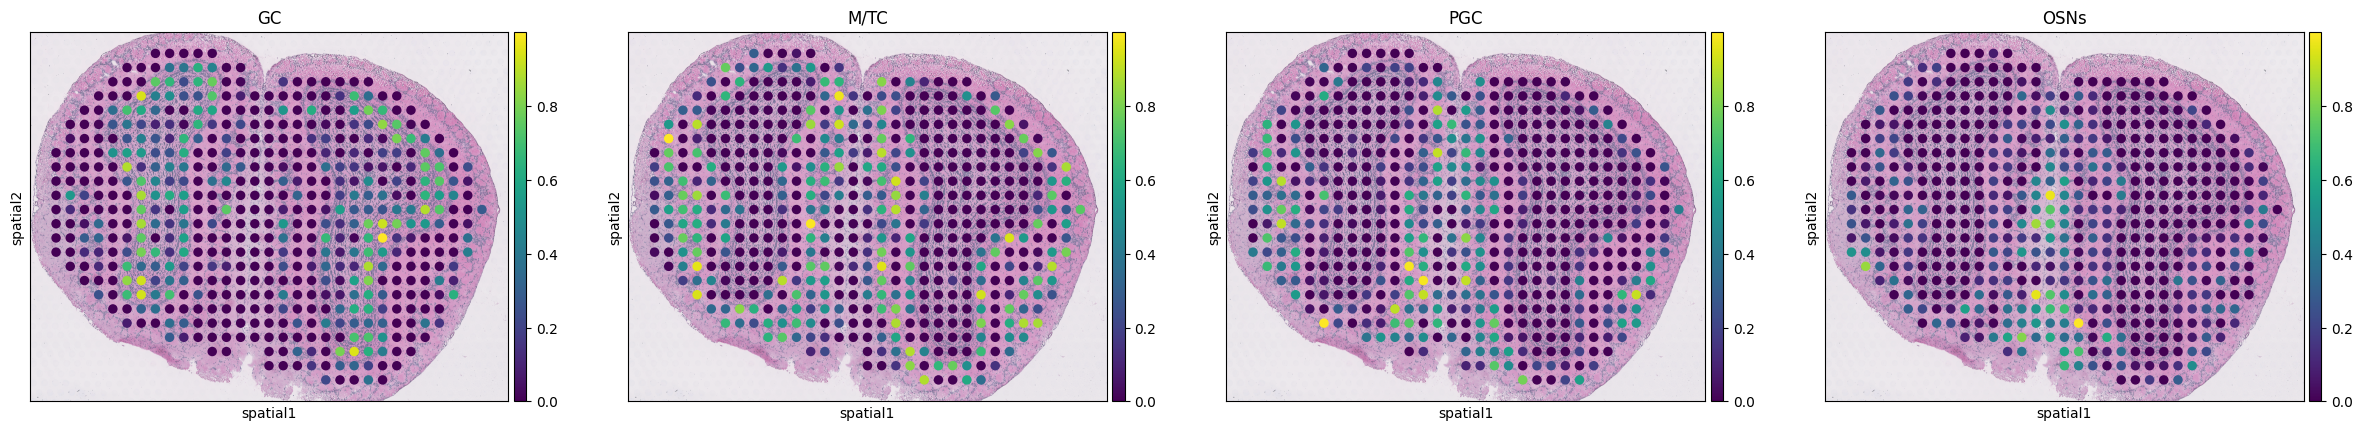

In [4]:
ss.plot_annotations(adata_st, annotation_reference='inferred_spot_annotations')

## Major cell type annotation

In [5]:
import numpy as np
adata_st.uns['annotation_list'] = np.array(adata_st.uns['annotation_list'])

In [6]:
adata_st.obs['major_celltype'] = adata_st.uns['annotation_list'][adata_st.obsm['inferred_spot_annotations'].argmax(1)]

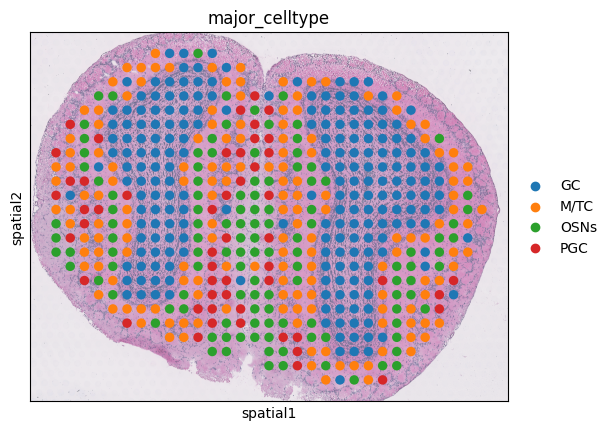

In [7]:
import scanpy as sc
sc.pl.spatial(adata_st, color="major_celltype", alpha_img=0.7)